# Import needed libraries

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import random

random.seed(123)

# Import python modules

In [3]:
# Get the absolute path of the 'src/data/' folder
src_data_notebooks = os.path.abspath(os.path.join(os.getcwd(), "../src/data/"))

# Add the 'src_data_notebooks' folder to the module search path
sys.path.append(src_data_notebooks)

# Import notebooks
import download_datasets
import dataset_controls
import random_data_generator

# Download files from cloud

In [4]:
# File IDs dictionary
file_ids = {
    "dim_people": "1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR",
    "fact_games_played": "1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN", 
}

# Get the path two levels up from the current working directory
base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# Loop through all files in the dictionary and download them
for file_name, file_id in file_ids.items():
    print(f"Downloading {file_name}...")
    
    # Construct the full URL to download the file using the file ID
    url = f"https://drive.google.com/uc?id={file_id}"
    
    # Call the function to download the file with the constructed URL
    download_datasets.download_file_from_cloud(url, base_path)

    print(f"{file_name} saved successfully!\n")

Downloading...
From: https://drive.google.com/uc?id=1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR
To: c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\notebooks\dim_people.csv
100%|██████████| 191k/191k [00:00<00:00, 5.24MB/s]


File saved at: c:\Users\Oscar\OneDrive\Documentos\Github\dim_people.csv
File successfully loaded. First rows:
dim_people saved successfully!



Downloading...
From: https://drive.google.com/uc?id=1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN
To: c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\notebooks\fact_games_played.csv
100%|██████████| 54.0/54.0 [00:00<00:00, 43.4kB/s]

File saved at: c:\Users\Oscar\OneDrive\Documentos\Github\fact_games_played.csv
File successfully loaded. First rows:
fact_games_played saved successfully!



# Load the dataframes

In [5]:
dict_dfs = download_datasets.opening_dataframes(file_ids, base_path)

Loading dim_people.csv...
Loading fact_games_played.csv...


# Generate random data

In [6]:
random_data_generator.change_id_to_autoincrement(dict_dfs['dim_people'])

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,9/27/1955,77,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,2/26/1959,88,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,6/22/1956,82,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,11/6/1951,100,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,11/24/1952,65,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,12/7/1957,99,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,11/23/1953,34,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,3/27/1952,43,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,6/7/1952,30,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [7]:
dataset_controls.calculate_age(dict_dfs['dim_people'], 'date_birth')

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,65,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [8]:
dict_dfs['dim_people']['country'] = 'Spain'

In [9]:
# Aplicar la función a un DataFrame
dict_dfs['dim_people']['languages_spoken'] = dict_dfs['dim_people'].apply(lambda row: random_data_generator.estimate_languages_spoken(row['age'], row['education_level']), axis=1)

In [10]:
dict_dfs['dim_people']

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Spain,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,2,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,65,Rupiah,Bogorejo,Spain,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,1,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Spain,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,2,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Spain,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,1,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Spain,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,1,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Spain,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,2,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Spain,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,1,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Spain,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,3+,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,Spain,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,2,152,76,Arthritis,Aspirin,Yoga


In [11]:
final_model_dataframe = dict_dfs['dim_people'][['email', 'age', 'education_level', 'languages_spoken', 'gender']]

In [12]:
fact_games_played = pd.DataFrame({'success': np.random.uniform(0, 1, size=10000)})

In [13]:
values = np.floor(fact_games_played['success'] * 100)/ 100

In [14]:
fact_games_played['success_proportion'] = values

In [15]:
fact_games_played['average_time'] = np.random.uniform(0, 3, size=10000)

In [16]:
fact_games_played

,success,success_proportion,average_time
0,0.461719,0.46,2.001523
1,0.664629,0.66,1.309431
2,0.324219,0.32,0.671549
3,0.113966,0.11,1.441426
4,0.160795,0.16,1.062706
...,...,...,...
9995,0.059400,0.05,2.344703
9996,0.736735,0.73,2.645234
9997,0.106016,0.10,1.654390
9998,0.432068,0.43,0.811670


In [17]:
# Add user information to fact games

# Add email as key id
random.seed(123)
emails_list = random.choices(dict_dfs['dim_people']["email"], k=10000)
fact_games_played["email"] = [str(emails_list[i]) for i in range(0, len(emails_list))]
fact_games_played


,success,success_proportion,average_time,email
0,0.461719,0.46,2.001523,llewcock1g@opera.com
1,0.664629,0.66,1.309431,khenric2f@mozilla.org
2,0.324219,0.32,0.671549,aruggsbb@scientificamerican.com
3,0.113966,0.11,1.441426,bmcgowan2z@mozilla.org
4,0.160795,0.16,1.062706,lgraalmansp1@about.me
...,...,...,...,...
9995,0.059400,0.05,2.344703,jyuj4@independent.co.uk
9996,0.736735,0.73,2.645234,dhoferl5@mtv.com
9997,0.106016,0.10,1.654390,lgherardellilj@bizjournals.com
9998,0.432068,0.43,0.811670,rdimmick3v@cyberchimps.com


In [18]:
# No sé por qué me da error acá
#final_model_dataframe_facts = final_model_dataframe.join(fact_games_played, on=["email"], how="right")
#final_model_dataframe_facts

# Por ahora uso el que tiene 1000 obs
final_model_dataframe_facts = final_model_dataframe

In [25]:
# Make average reaction time and accuracy in game a function of age and education 
final_model_dataframe_facts["average_time"] = final_model_dataframe_facts.apply(lambda row: random_data_generator.generate_reaction_time(row['age'], row['education_level']), axis=1)
final_model_dataframe_facts["accuracy"] = final_model_dataframe_facts.apply(lambda row: random_data_generator.generate_accuracy(row['age'], row['education_level']), axis=1)
final_model_dataframe_facts

C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\1874364860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_model_dataframe_facts["average_time"] = final_model_dataframe_facts.apply(lambda row: random_data_generator.generate_reaction_time(row['age'], row['education_level']), axis=1)
C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\1874364860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_model_dataframe_facts["accuracy"] = final_model_dataframe_facts.apply(lambda row: random_data_gene

,email,age,education_level,languages_spoken,gender,average_time,accuracy,cog_level
0,tmathy0@mapquest.com,69,University,2,Male,17.140928,0.553850,Bajo
1,mdewitt1@nymag.com,65,Primary School,1,Female,15.400649,0.010473,Alto
2,dblacker2@wiley.com,68,University,2,Male,16.411966,0.483259,Bajo
3,dvales3@cafepress.com,73,University,1,Female,24.398766,0.483259,Bajo
4,mbroster4@hatena.ne.jp,72,High School,1,Female,23.880781,0.010473,Bajo
...,...,...,...,...,...,...,...,...
995,iwortersrn@yale.edu,67,High School,2,Female,16.120261,0.010473,Bajo
996,wpetrasekro@t.co,71,High School,1,Male,23.142311,0.010473,Bajo
997,sathelstanrp@mayoclinic.com,72,University,3+,Male,23.812439,0.176156,Alto
998,bphilimorerq@archive.org,72,Primary School,2,Female,23.955183,0.176156,Bajo


In [142]:
# Generate cognitive level value
time_reference = 15.73
acc_reference = 0.1
final_model_dataframe_facts["cog_level"] = final_model_dataframe_facts.apply(lambda row: random_data_generator.generate_cog_state(row["average_time"], row["accuracy"], time_reference, acc_reference ), axis=1)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\2061107409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_model_dataframe_facts["cog_level"] = final_model_dataframe_facts.apply(lambda row: random_data_generator.generate_cog_state(row["average_time"], row["accuracy"], time_reference, acc_reference ), axis=1)


In [39]:
# Check
final_model_dataframe_facts.describe()

,age,average_time,accuracy
count,1000.000000,1000.000000,1000.000000
mean,69.119000,19.177126,0.217414
std,3.231297,4.047861,0.200586
min,64.000000,14.343906,0.010473
25%,66.000000,15.715564,0.010473
50%,69.000000,17.017512,0.176156
75%,72.000000,23.806749,0.483259
max,75.000000,26.014230,0.553850


# Train model 
Nota: esta parte debería ir en otro script, pero no sé bien cómo guardar los datos generados para luego llamarlos desde otro script. Por ahora escribo esta parte acá pero la idea es que, cuando tengamos los datos generados y guardados en un archivo, usemos el script en models/logistic_model.ipynb

In [115]:
# Librerias
import sys
import os
import pandas as pd
import numpy as np
import random 
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,roc_curve, auc, ConfusionMatrixDisplay

In [143]:
# Load data
main_data = final_model_dataframe_facts # Acá debería ser el cargue del archivo de datos
main_data["cog_level"].value_counts() # Check

cog_level
Bajo     491
Medio    256
Alto     253
Name: count, dtype: int64

In [144]:
# Encode target variable
main_data["cog_level"] = main_data["cog_level"].replace({"Bajo": 0, "Medio": 1, "Alto": 2})
main_data["cog_level"].value_counts() # Check

C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\558947828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_data["cog_level"] = main_data["cog_level"].replace({"Bajo": 0, "Medio": 1, "Alto": 2})
C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\558947828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["cog_level"] = main_data["cog_level"].replace({"Bajo": 0, "Medio": 1, "Alto": 2})


cog_level
0    491
1    256
2    253
Name: count, dtype: int64

In [145]:
# Divide into train and test sets

# --- Define X and y
X = main_data[["age", "education_level", "languages_spoken", "gender", "average_time", "accuracy"]]
y = main_data["cog_level"]

print(X[["education_level"]].value_counts())
print(X[["languages_spoken"]].value_counts())
print(X[["gender"]].value_counts())

# --- Too few members for these categories
X["gender"] = X["gender"].replace({"Polygender": "Other", "Genderqueer": "Other", "Genderfluid": "Other", 
                                   "Non-binary": "Other", "Agender": "Other", "Bigender": "Other"})

print(X["gender"].value_counts())

# One hot encode categorical variables
X = pd.get_dummies(X, columns=["education_level", "gender", "languages_spoken"])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# Scale age, time and accuracy
X_train_sc = scale_vars(X_train, col_names=["age", "accuracy", "average_time"])
X_test_sc = scale_vars(X_test, col_names=["age", "accuracy", "average_time"])


education_level
University         353
Primary School     327
High School        320
Name: count, dtype: int64
languages_spoken
1                   552
2                   345
3+                  103
Name: count, dtype: int64
gender     
Male           461
Female         440
Polygender      23
Genderqueer     21
Genderfluid     20
Non-binary      20
Agender         10
Bigender         5
Name: count, dtype: int64
gender
Male      461
Female    440
Other      99
Name: count, dtype: int64


C:\Users\Oscar\AppData\Local\Temp\ipykernel_17500\1943914500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].replace({"Polygender": "Other", "Genderqueer": "Other", "Genderfluid": "Other",


In [146]:
# Define params grid and scoring metrics
params = {
    "C": [0.1, 0.5, 1]
}
scoring_metrics = ["accuracy", "precision", "recall"]

# Set model and train
logit_model = LogisticRegression(random_state=123, fit_intercept=False) # Falso porque tenemos dummies para todas las categorías
model = GridSearchCV(estimator=logit_model, cv=4, param_grid=params, refit="accuracy", scoring=scoring_metrics)
model.fit(X_train_sc, y_train) 


c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
         

GridSearchCV(cv=4,
             estimator=LogisticRegression(fit_intercept=False,
                                          random_state=123),
             param_grid={'C': [0.1, 0.5, 1]}, refit='accuracy',
             scoring=['accuracy', 'precision', 'recall'])

In [147]:
# Get best model and evaluate
best_model = model.best_estimator_

preds = best_model.predict(X_test_sc)
# preds_proba = best_model.predict_proba(X_test) # To get probabilities for each class

accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds, average="weighted")
f1 = f1_score(y_test, preds, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


Accuracy: 0.6333333333333333
Recall: 0.6333333333333333
F1: 0.5558324295596059


[[139   2  10]
 [ 51   3  20]
 [ 27   0  48]]


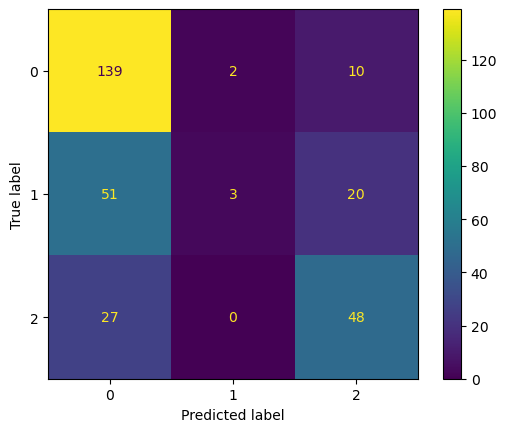

In [148]:
# CM
print(confusion_matrix(y_test, preds, labels=model.classes_))

# CM Heatmap
cm = confusion_matrix(y_test, preds, labels=model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_disp.plot()
plt.show()